In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data=pd.read_csv("C:\\Users\\Rahul Kiran\\Videos\\AMD\\epi_r.csv",encoding='utf-8')

In [3]:
calories=['low carb','low cholesterol','low fat','low sodium','low sugar','no sugar added']
nonveg=['beef','beef rib','beef shank','beef tenderloin','chicken','egg','fish']

columns=['title','rating','calories','protein','fat','sodium','beef','beef rib','beef shank','beef tenderloin','chicken','egg','fish','low cal','low carb','low cholesterol','low fat','low sodium','low sugar','no sugar added']

titledata=pd.DataFrame(data.loc[:,columns])

In [4]:
        
titledata['Meat']=titledata[nonveg].sum(axis=1)
titledata.head()

,title,rating,calories,protein,fat,sodium,beef,beef rib,beef shank,beef tenderloin,...,egg,fish,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,no sugar added,Meat
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
titledata.drop(nonveg,axis=1,inplace=True)
titledata.drop(calories,axis=1,inplace=True)

In [6]:
titledata.drop_duplicates(keep='first',inplace=True)

In [7]:
titledata.dropna(inplace=True)

In [8]:
titledata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14435 entries, 0 to 20051
Data columns (total 8 columns):
title       14435 non-null object
rating      14435 non-null float64
calories    14435 non-null float64
protein     14435 non-null float64
fat         14435 non-null float64
sodium      14435 non-null float64
low cal     14435 non-null float64
Meat        14435 non-null float64
dtypes: float64(7), object(1)
memory usage: 1015.0+ KB


In [9]:
titledata.describe()

,rating,calories,protein,fat,sodium,low cal,Meat
count,14435.000000,1.443500e+04,14435.000000,1.443500e+04,1.443500e+04,14435.000000,14435.000000
mean,3.763985,6.652092e+03,92.446484,3.637604e+02,6.603501e+03,0.035954,0.259023
std,1.272761,3.756505e+05,3516.008567,2.136880e+04,3.492126e+05,0.186183,0.461074
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.750000,2.060000e+02,3.000000,8.000000e+00,9.000000e+01,0.000000,0.000000
50%,4.375000,3.470000e+02,9.000000,1.800000e+01,3.060000e+02,0.000000,0.000000
75%,4.375000,6.010000e+02,28.000000,3.400000e+01,7.350000e+02,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,3.000000


In [10]:
food2000=titledata[titledata['calories']<2000]
food2000.describe()

,rating,calories,protein,fat,sodium,low cal,Meat
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000
mean,3.761156,437.106318,19.036832,24.292393,654.498938,0.036407,0.256056
std,1.273678,336.517122,25.841717,24.209302,2859.802531,0.187308,0.458164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,204.000000,3.000000,8.000000,86.250000,0.000000,0.000000
50%,4.375000,338.000000,8.000000,18.000000,296.000000,0.000000,0.000000
75%,4.375000,579.000000,27.000000,32.750000,698.000000,0.000000,0.000000
max,5.000000,1993.000000,327.000000,194.000000,132220.000000,1.000000,3.000000


In [11]:
cl=food2000.loc[:,'protein'].copy()
fl=food2000.loc[:,'fat'].copy()
food2000.loc[:,'pcal']=cl.apply(lambda x:x*4)
food2000.loc[:,'fcal']=fl.apply(lambda x:x*9)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
food2000.loc[:,'carb']=food2000.loc[:,'calories']-(food2000.loc[:,'pcal']+food2000.loc[:,'fcal'])

In [13]:
food2000.loc[:,'carbcal']=(food2000.loc[:,'carb'])/4.0

In [14]:
#target=Veg/NonVeg 0/1

"""
def target(x):
    if(x==1.0):
        return 'LowMeat'
    elif(x==2.0):
        return 'MediumMeat'
    elif(x==3.0):
        return 'HighMeat'
    else:
        return 'NoMeat'

"""
#food2000.loc[:,'Meat']=food2000.loc[:,'Meat'].astype(str)
#food2000.loc[:,'Meat']=food2000.loc[:,'Meat'].apply(lambda x:target(x))
food2000.describe()

,rating,calories,protein,fat,sodium,low cal,Meat,pcal,fcal,carb,carbcal
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000
mean,3.761156,437.106318,19.036832,24.292393,654.498938,0.036407,0.256056,76.147330,218.631534,142.327454,35.581864
std,1.273678,336.517122,25.841717,24.209302,2859.802531,0.187308,0.458164,103.366869,217.883721,131.610012,32.902503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,-3.500000
25%,3.750000,204.000000,3.000000,8.000000,86.250000,0.000000,0.000000,12.000000,72.000000,47.000000,11.750000
50%,4.375000,338.000000,8.000000,18.000000,296.000000,0.000000,0.000000,32.000000,162.000000,113.000000,28.250000
75%,4.375000,579.000000,27.000000,32.750000,698.000000,0.000000,0.000000,108.000000,294.750000,197.000000,49.250000
max,5.000000,1993.000000,327.000000,194.000000,132220.000000,1.000000,3.000000,1308.000000,1746.000000,1737.000000,434.250000


In [15]:
def carb(x):
    if(x<0.0):
        x=0.0
        return x
    else:
        return x

food2000.loc[:,'carb']=food2000.loc[:,'carb'].apply(lambda x:carb(x))
food2000.loc[:,'carbcal']=food2000.loc[:,'carbcal'].apply(lambda x:carb(x))

In [16]:
food2000.describe()

,rating,calories,protein,fat,sodium,low cal,Meat,pcal,fcal,carb,carbcal
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000
mean,3.761156,437.106318,19.036832,24.292393,654.498938,0.036407,0.256056,76.147330,218.631534,142.347995,35.586999
std,1.273678,336.517122,25.841717,24.209302,2859.802531,0.187308,0.458164,103.366869,217.883721,131.587385,32.896846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,204.000000,3.000000,8.000000,86.250000,0.000000,0.000000,12.000000,72.000000,47.000000,11.750000
50%,4.375000,338.000000,8.000000,18.000000,296.000000,0.000000,0.000000,32.000000,162.000000,113.000000,28.250000
75%,4.375000,579.000000,27.000000,32.750000,698.000000,0.000000,0.000000,108.000000,294.750000,197.000000,49.250000
max,5.000000,1993.000000,327.000000,194.000000,132220.000000,1.000000,3.000000,1308.000000,1746.000000,1737.000000,434.250000


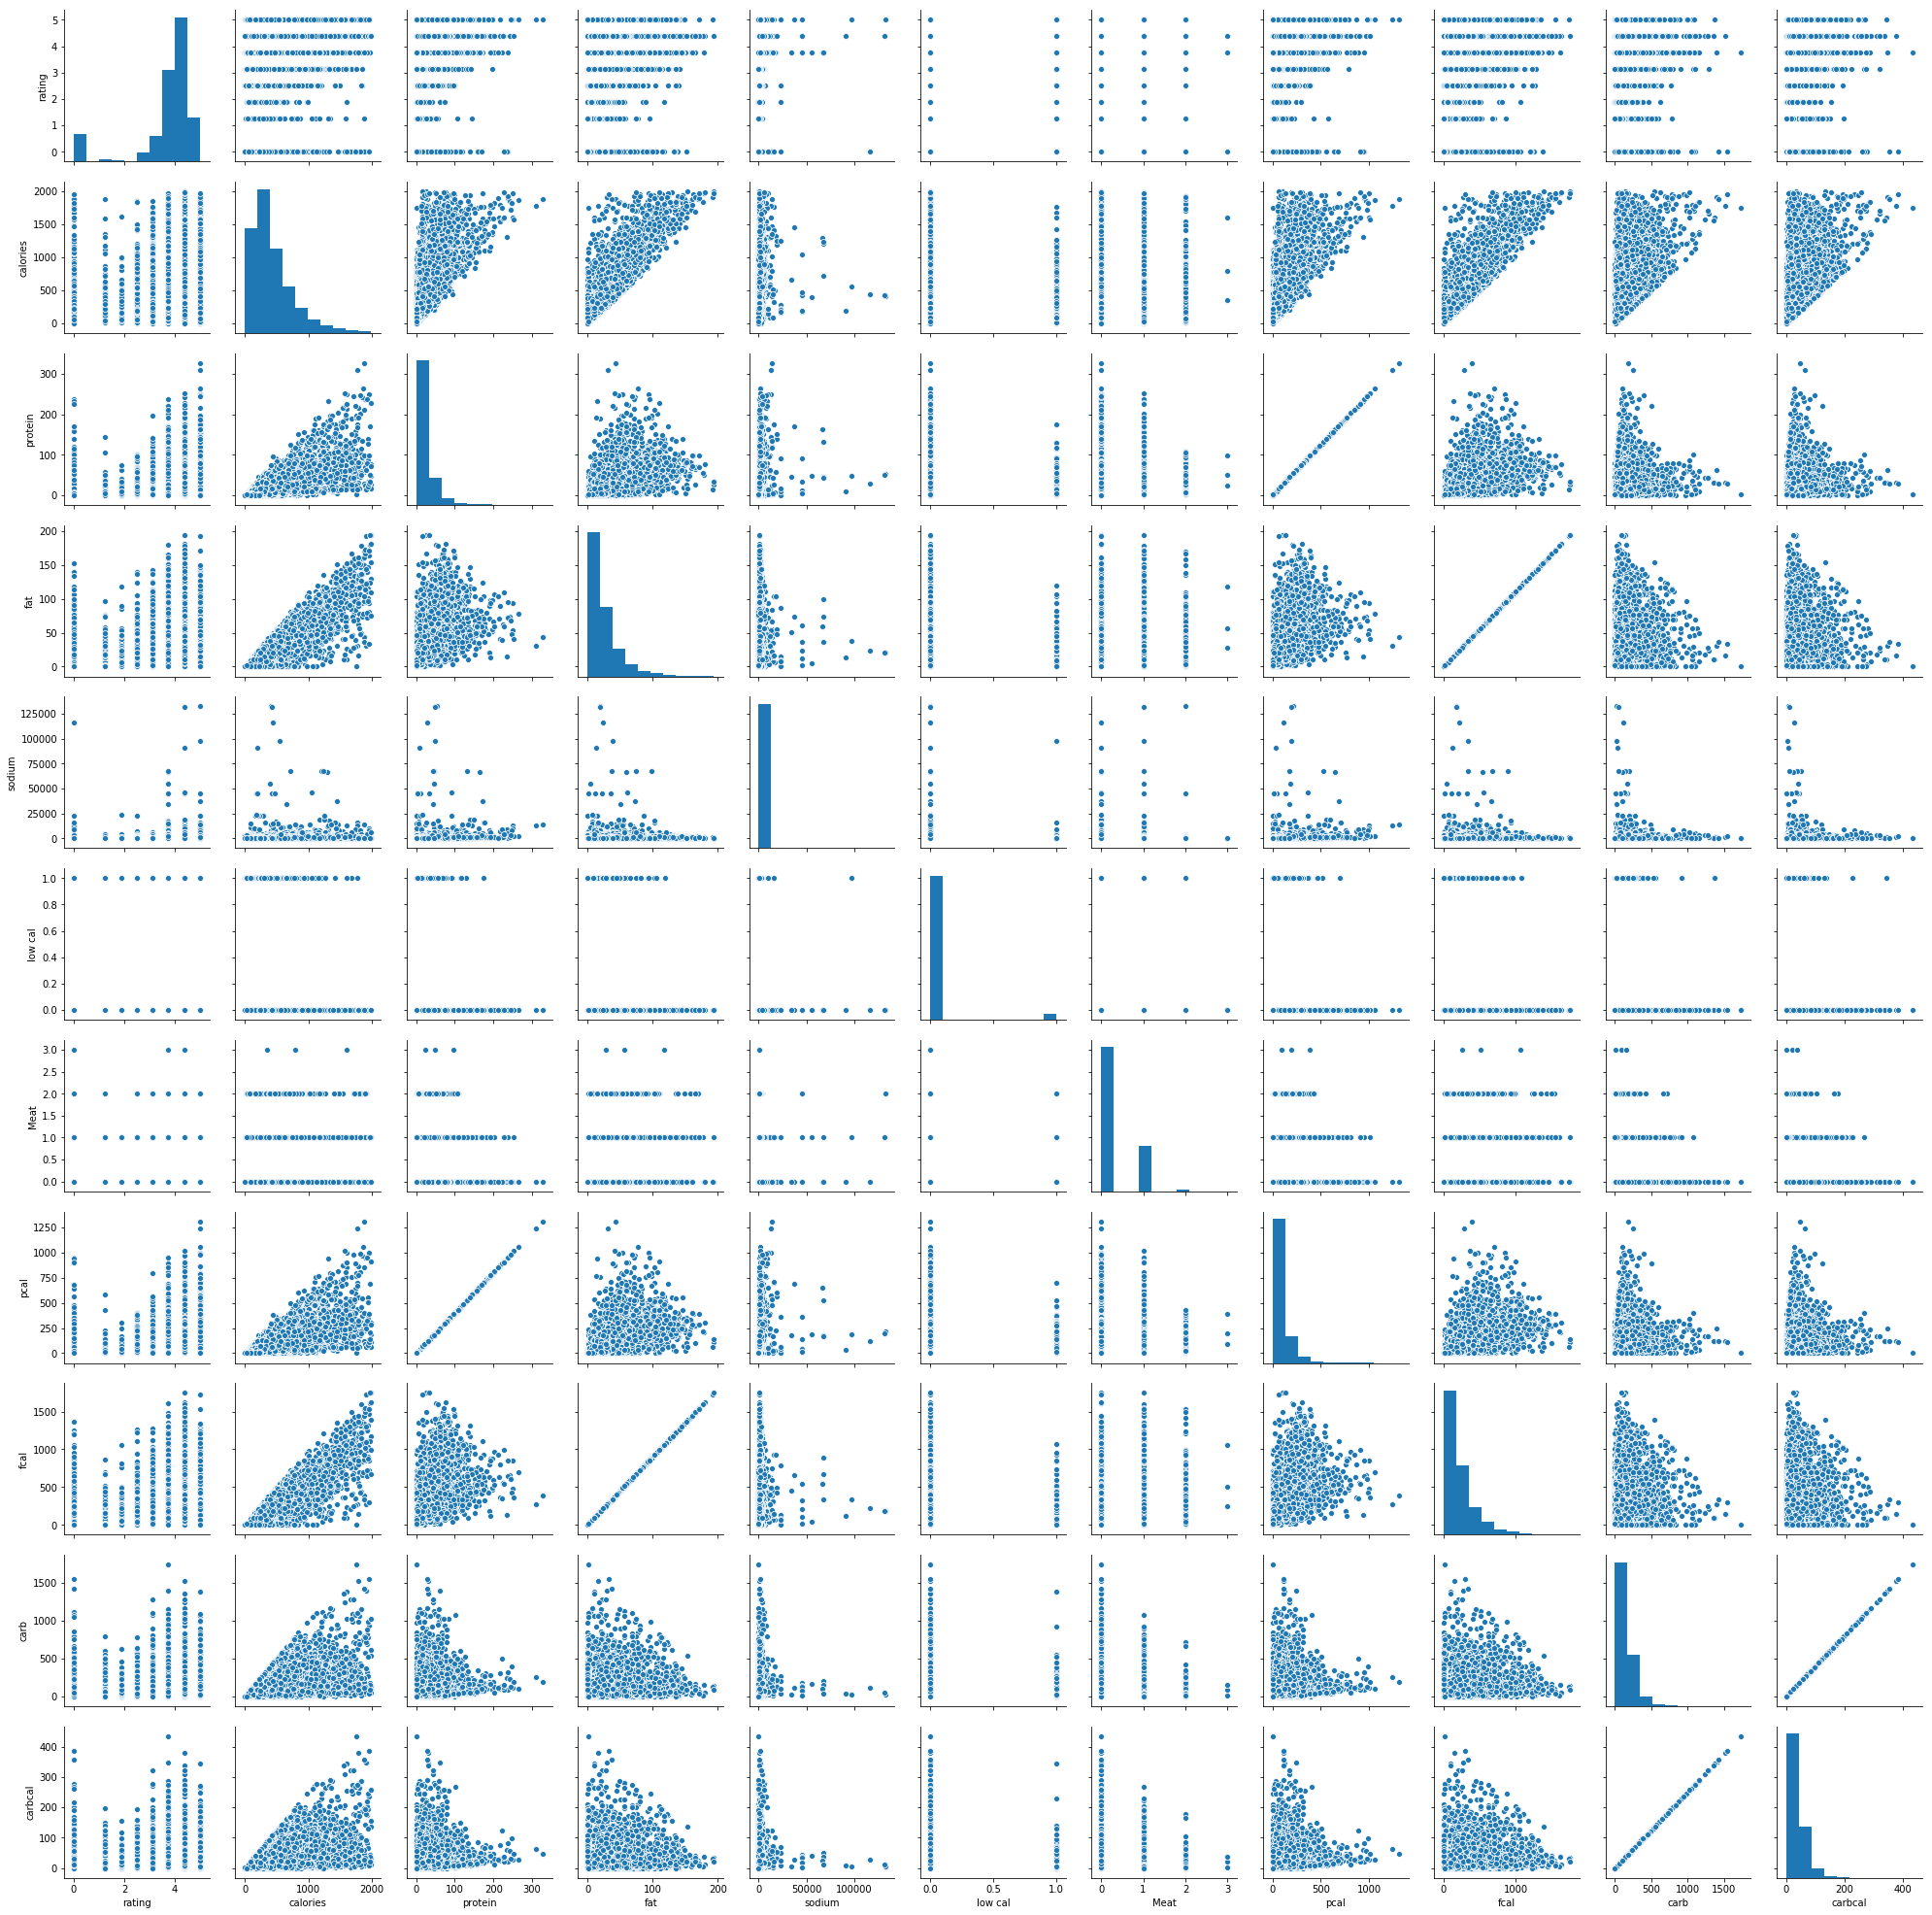

In [17]:
sns_plot=sns.pairplot(food2000)
sns_plot.savefig("Univariate.png")

In [18]:
Rating=food2000[food2000['Meat']!=0.0].copy().sort_values(by=['rating','pcal'],ascending=False)

In [19]:
#What are the top 10 recipes according to the ratings?
Rating['title'].head(10)

1658                   Crunchy Eggs with Piquillo Peppers 
16849                                       Bouillabaisse 
17782            Braised Beef with Pears and Fresh Ginger 
11450    Porterhouse Steaks with Arugula and Parmesan C...
7306     Rosemary-Crumb Beef Tenderloin with Pancetta-R...
7526     Roast Capon with Chile-Cilantro Rub and Roaste...
622                         Our Favorite Texas Beef Chili 
3241         Roasted Organic Chicken with Moroccan Spices 
3235                                     Smoked Fish Trio 
19447    Roast Prime Ribs of Beef with Shiitake Pan Gravy 
Name: title, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


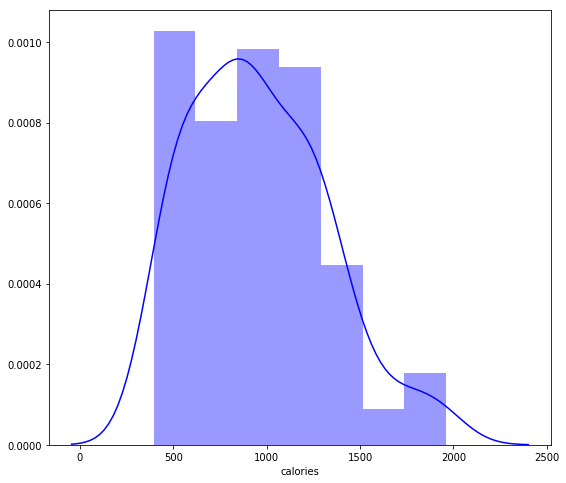

In [20]:
#What are the average calories in top 100 rated recipes?
plt.figure(figsize=(9, 8))
sns_plot=sns.distplot(Rating.loc[:,'calories'].copy().head(100),color='b')
fig=sns_plot.get_figure()
fig.savefig('Calories.png')

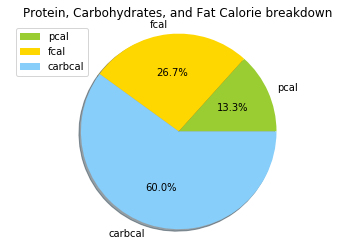

In [21]:
#What does the Protein, Carbohydrate, and Fat breakdown look like in Pie Chart form for the top 1000 rated recipes? 
#Need to show a pie chart with labels.

Rating1000=Rating.head(1000)

labels = ['pcal','fcal','carbcal']
sizes = [Rating1000['pcal'].value_counts()[0],
         Rating1000['fcal'].value_counts()[0],
         Rating1000['carbcal'].value_counts()[0],
      ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
colors = ['yellowgreen', 'gold', 'lightskyblue']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,colors=colors)
plt.title("Protein, Carbohydrates, and Fat Calorie breakdown")
plt.legend(labels, loc="best")
ax1.axis('equal')
plt.show()

In [22]:
#What are the descriptive stats (Mean, Median, Standard Deviation) for all recipes Calories, Protein, Carbohydrates, and Fat? 
#Show in table form.
#descriptive stats
cols=['calories','pcal','fcal','carbcal']
desc=food2000[cols]

dstat=dict()
dstat['mean']=list(desc.mean())
dstat['median']=list(desc.median())
dstat['std']=list(desc.std())

table=pd.DataFrame(data=dstat,index=cols)


In [23]:
table.transpose().style.background_gradient(cmap= 'spring')

,calories,pcal,fcal,carbcal
mean,437.106,76.1473,218.632,35.587
median,338,32,162,28.25
std,336.517,103.367,217.884,32.8968


In [24]:
food2000.columns=food2000.columns.str.replace(' ','')

In [25]:
def min_max_values(df,col):
    #return top and bottom values of a column
    
    top=df[col].idxmax()
    top_obs=pd.DataFrame(df.loc[top])
    
    bottom=df[col].idxmin()
    bottom_obs=pd.DataFrame(df.loc[bottom])

    
    min_max=pd.concat([top_obs,bottom_obs],axis=1)

    return min_max

min_max_values(food2000[food2000['Meat']==2.0],'pcal')

,2009,9993
title,Short Ribs Braised in Coffee Ancho Chile Sauce,Caviar on Pumpernickel with Sour Cream
rating,4.375,3.75
calories,998,22
protein,108,1
fat,57,2
sodium,1527,68
lowcal,0,0
Meat,2,2
pcal,432,4
fcal,513,18


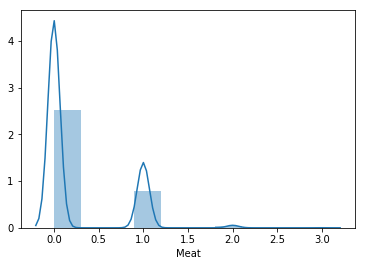

In [26]:
#histogram of continuous variable
#Univariate Analysis
num_bins=10

sns.distplot(food2000['Meat'],num_bins)

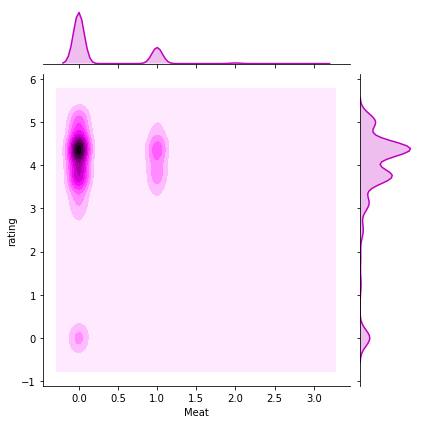

In [27]:
#Bivariate Analysis
sns_plot=sns.jointplot(x="Meat", y="rating", data=food2000,kind="kde", color="m");
sns_plot.savefig("Bivariate.png")

In [28]:
food2000[food2000['rating']>3].groupby('Meat').size()

Meat
0.0    9227
1.0    3092
2.0     121
3.0       2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E50BF88390>,
      dtype=object)

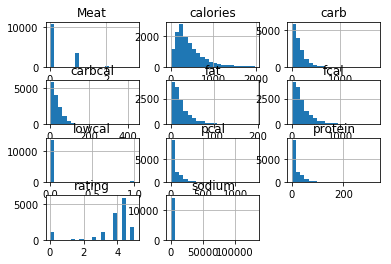

In [29]:
food2000.hist(bins=20)

In [30]:
epiCorr=food2000.iloc[:,1:].corr()['Meat'][:-1]

In [31]:
# As Meat Goes down from 1 t0 0 the Low cl and Carbohydrates increares
epiCorr

rating      0.059668
calories    0.211178
protein     0.276836
fat         0.231474
sodium      0.045716
lowcal     -0.034348
Meat        1.000000
pcal        0.276836
fcal        0.231474
carb       -0.060677
Name: Meat, dtype: float64

In [32]:
food2000['Meat'].value_counts()

0.0    10637
1.0     3350
2.0      128
3.0        3
Name: Meat, dtype: int64

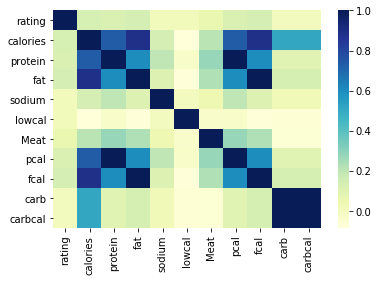

In [33]:
#cols2=food2000.columns
#cols2.drop('Meat')
#sns.pairplot(food2000[cols2],y_vars='Meat',x_vars=cols2)
corr=food2000.corr()

sns_plot=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="YlGnBu")

fig=sns_plot.get_figure()
fig.savefig('Correlation.png')

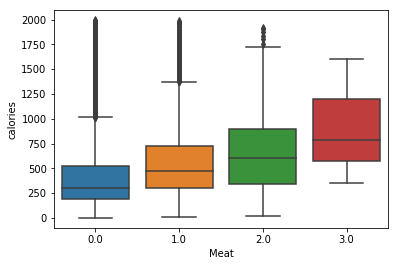

In [34]:
sns_plot=sns.boxplot(x='Meat',y='calories',data=food2000)
fig=sns_plot.get_figure()
fig.savefig('Meat_calories.png')

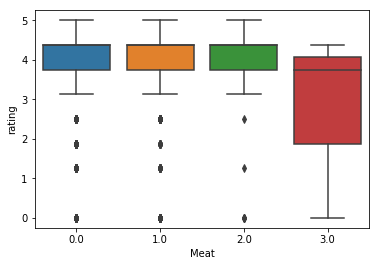

In [35]:
sns_plot=sns.boxplot(x='Meat',y='rating',data=food2000)
fig=sns_plot.get_figure()
fig.savefig('Meat_Rating.png')

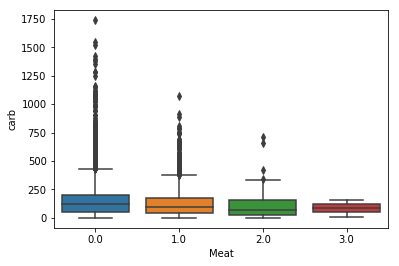

In [36]:
sns_plot=sns.boxplot(x='Meat',y='carb',data=food2000)
fig=sns_plot.get_figure()
fig.savefig('Meat_carb.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


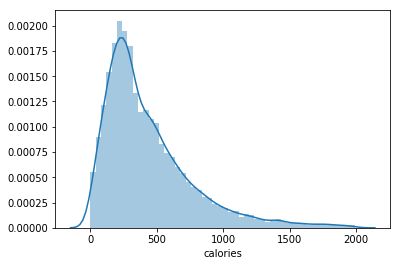

In [37]:
sns.distplot(food2000['calories'],kde=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

cols=food2000.columns
cols=cols.drop('title')
food2000=food2000.loc[:,cols]
food2000 = shuffle(food2000)

In [39]:
#scaler.fit(food2000)

X = food2000.loc[:, food2000.columns != 'Meat']
y = food2000['Meat']



In [40]:
#Recursive Feature Elimination (RFE) 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
rfe = RFE(logreg, 4)
newX=rfe.fit_transform(X,y)

rfe.n_features_
print(rfe.support_)
print(rfe.ranking_)

y.value_counts()

[ True  True False False False  True False False  True False]
[1 1 5 6 7 1 3 2 1 4]


0.0    10637
1.0     3350
2.0      128
3.0        3
Name: Meat, dtype: int64

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.3, random_state=47)
scaler.fit(X_train)
trainX = scaler.transform(X_train)
testX = scaler.transform(X_test)


clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=500, alpha=0.01,learning_rate='adaptive',
                     solver='sgd', verbose=10,  random_state=45)


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 1.24089532
Iteration 2, loss = 1.11003173
Iteration 3, loss = 1.01032608
Iteration 4, loss = 0.93778455
Iteration 5, loss = 0.88445582
Iteration 6, loss = 0.84440025
Iteration 7, loss = 0.81380240
Iteration 8, loss = 0.78985827
Iteration 9, loss = 0.77069892
Iteration 10, loss = 0.75503484
Iteration 11, loss = 0.74198676
Iteration 12, loss = 0.73093912
Iteration 13, loss = 0.72145826
Iteration 14, loss = 0.71318403
Iteration 15, loss = 0.70589206
Iteration 16, loss = 0.69942209
Iteration 17, loss = 0.69361607
Iteration 18, loss = 0.68838278
Iteration 19, loss = 0.68362907
Iteration 20, loss = 0.67929347
Iteration 21, loss = 0.67532549
Iteration 22, loss = 0.67167764
Iteration 23, loss = 0.66831246
Iteration 24, loss = 0.66520850
Iteration 25, loss = 0.66233185
Iteration 26, loss = 0.65964172
Iteration 27, loss = 0.65715539
Iteration 28, loss = 0.65483210
Iteration 29, loss = 0.65265903
Iteration 30, loss = 0.65062526
Iteration 31, loss = 0.64871421
Iteration 32, los

In [42]:
accuracy_score(y_test, y_pred)

0.7589707271010387

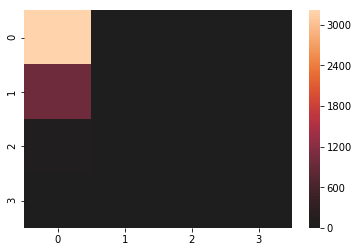

array([[3215,    0,    0,    0],
       [ 974,    0,    0,    0],
       [  46,    0,    0,    0],
       [   1,    0,    0,    0]], dtype=int64)

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True,)
plt.show()

cm

In [44]:
import statsmodels.formula.api as sm

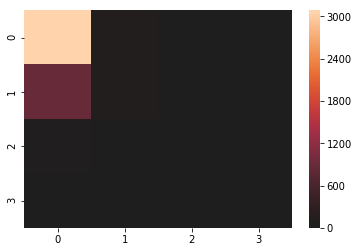

In [45]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True,)
plt.show()

In [46]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified
acc=accuracy_score(y_test, y_pred)
acc

0.7509442870632672

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.77      0.96      0.85      3215
        1.0       0.42      0.10      0.16       974
        2.0       0.00      0.00      0.00        46
        3.0       0.00      0.00      0.00         1

avg / total       0.68      0.75      0.69      4236



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
